<a href="https://colab.research.google.com/github/Amey-Thakur/TSF-SUPERVISED-LEARNING-ML/blob/main/TSF_INTERNSHIP_TASK_1_SUPERVISED_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation - Supervised Learning ML
- Created By Amey Mahendra Thakur

## Task: To Predict the percentage of a student based on the no. of study hours.

## Step 1- Importing Libraries and Loading Dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

In [2]:
data = pd.read_csv(r"/content/scores.csv")

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 2: Exploratory Data Analysis

In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


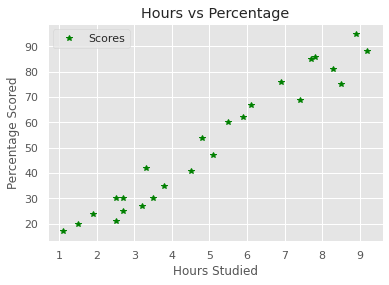

In [7]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', color='green', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

### Preparing the Data
The next step is to divide the data into attributes(inputs) and labels(outputs).

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### Splitting the data into Training and Testing sets.

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Percentage Scored')

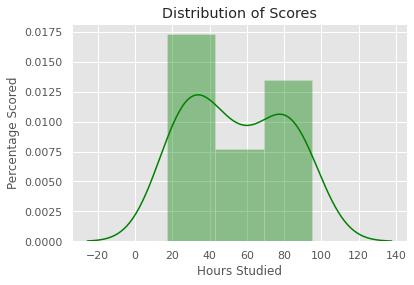

In [10]:
sns.distplot(y_train, kde=True, color='green',)
plt.title('Distribution of Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Percentage Scored')

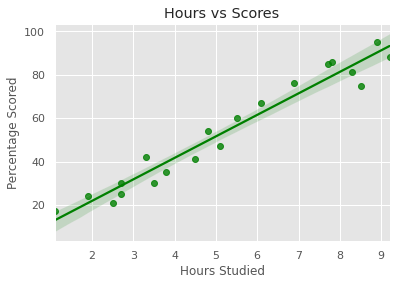

In [11]:
sns.regplot(X_train, y_train, color='green', )
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')

## Step 3: Training the Algorithm
After splitting the data into training and testing sets, We have to train our Algorithm

In [12]:
from sklearn.linear_model import LinearRegression  
training = LinearRegression()  
training.fit(X_train, y_train) 
print("Training completed using " + str(training))

Training completed using LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [13]:
#predicting the test set results
y_pred = training.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(5)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Step 4: Visualizing the Results

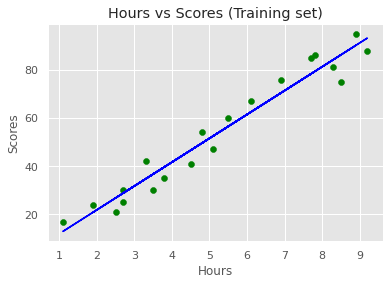

In [14]:
#visualising the training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train,  training.predict(X_train), color= 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

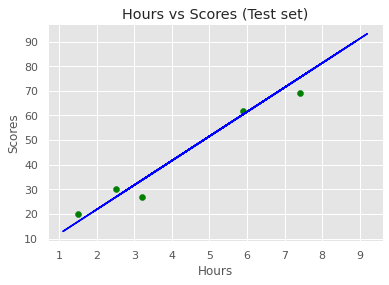

In [15]:
#visualising the test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train,  training.predict(X_train), color= 'blue')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Step 5: Model Evaluation

In [16]:
k = X_test.shape[1]
n = len(X_test)
n

5

In [17]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn import metrics  
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('R2 =', r2, '\nAdjusted R2 =', adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

R2 = 0.9454906892105354 
Adjusted R2 = 0.9273209189473804
Mean Absolute Error: 4.183859899002982


## Step 6: Predicting Future Data

In [18]:
Hours = 9.25
prediction = training.predict([[Hours]])
print("Number of Hours = {}".format(Hours))
print("Predicted Score = {}".format(prediction[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737539
